## Context of Data

Company-wide Employees E-Commerce purchase data

Customers - Most purchased ones are belongs to Dietitian, Lawyers professionals

Transactions purchase range on average of $50

Transaction purchase period all through 24hours

Results obtained from Exploratory Data Analysis (EDA)

<font color=blue>

1. The customer with the highest number of purchase comes from the Dietitian Professionals

2. 'Brown Ltd' company's employees have purchased most values as $796.38

3. The TOP 5 companies employees placed the highest number of purchases as below:

        Brown Ltd
        Williams LLC
        Smith LLC
        Smith PLC
        Johnson Ltd

4. The TOP purchased customer brownsarah@gmail.com with the value as $198.83

5. The Top 5 customer's purchases are
        brownsarah@gmail.com    ==> $198.83
        wjohnson@yahoo.com      ==> $175.61
        cgray@gmail.com         ==> $154.41
        lawrenceemily@yahoo.com ==> $154.31
        wilsonjohn@yahoo.com    ==> $153.36

6. The highest number of purchase are done in the evening(PM)

7. The highest number of purchase are done by [ru] language customers

8. Majority of the customers(around 79.2%) customers are using Mozilla for browsing and to purchase items
</font>

In [1]:
import numpy as np
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ecom = pd.read_csv('Ecommerce_Purchases.csv')
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [3]:
ecom['Purchase Price'].describe()

count    10000.000000
mean        50.347302
std         29.015836
min          0.000000
25%         25.150000
50%         50.505000
75%         75.770000
max         99.990000
Name: Purchase Price, dtype: float64

In [4]:
# People who have English 'en' as their Language of choice on the website

ecom[ecom['Language']=='en'].count()

Address             1098
Lot                 1098
AM or PM            1098
Browser Info        1098
Company             1098
Credit Card         1098
CC Exp Date         1098
CC Security Code    1098
CC Provider         1098
Email               1098
Job                 1098
IP Address          1098
Language            1098
Purchase Price      1098
dtype: int64

In [5]:
#count number of transacations in AM and PM
ecom['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [6]:
#top five jobs
ecom['Job'].value_counts().head(5)

Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Designer, jewellery                  27
Research officer, political party    27
Name: Job, dtype: int64

In [7]:
#top five email providers
ecom['Email'].apply(lambda x: x.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [8]:

selected_columns = ecom[['AM or PM', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price']]

cleaned_ecom = selected_columns.copy()

In [9]:
#clean up address
address = ecom['Address'].str.extract(r",*\W*([A-Z]{2}\W+[0-9\-]*)$", expand = False)
address = address.str.split(pat=r"\W|\-", expand = True)

In [10]:
#clean browser
browser = ecom['Browser Info'].str.split(pat=r" |\(|\)", expand = True)
browser_and_ver = browser[0].str.split(pat=r"/", expand = True)

In [11]:
cleaned_ecom['Browser'] = browser_and_ver[0]
cleaned_ecom['Browser Version'] = browser_and_ver[1]
cleaned_ecom['CC Exp Year'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[1].astype(int)
cleaned_ecom['CC Exp Month'] = ecom['CC Exp Date'].str.split(pat=r"/", expand = True)[0].astype(int)
cleaned_ecom['State'] =   address[0]
cleaned_ecom['ZIP Code'] =   address[1]
cleaned_ecom['ZIP Code'] = cleaned_ecom['ZIP Code'].astype(int)
cleaned_ecom['CC Provider'] = cleaned_ecom['CC Provider'].str.split(pat = '\d', expand = True)[0]
cleaned_ecom.nunique() #There are 10000 different credit cards registered and 10000 different IP addresses
#but interestingly not 10000 different email addresses. Hence email address is not used to maintain user account 

AM or PM                2
Company              8653
Credit Card         10000
CC Exp Date           121
CC Security Code     1758
CC Provider             8
Email                9954
Job                   623
IP Address          10000
Language                9
Purchase Price       6349
Browser                 2
Browser Version       181
CC Exp Year            11
CC Exp Month           12
State                  62
ZIP Code             9543
dtype: int64

In [12]:
# Write contents of the DataFrame to a CSV file

#newcsvFileName = 'New_Ecommerce_Purchases.csv'

#new_ecom.to_csv(newcsvFileName,index=False);

In [13]:
cleaned_ecom = cleaned_ecom.drop_duplicates() #drop duplicates if any
cleaned_ecom

,AM or PM,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Browser,Browser Version,CC Exp Year,CC Exp Month,State,ZIP Code
0,PM,Martinez-Herman,6011929061123406,02/20,900,JCB,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,Opera,9.56.,20,2,NE,77130
1,PM,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,Opera,8.93.,18,11,TN,84355
2,PM,"Simpson, Williams and Pham",675957666125,08/19,699,JCB,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,Mozilla,5.0,19,8,AP,27450
3,PM,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,Mozilla,5.0,24,2,WA,45798
4,AM,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,Opera,9.58.,25,10,TX,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PM,Randall-Sloan,342945015358701,03/22,838,JCB,iscott@wade-garner.com,Printmaker,29.73.197.114,it,82.21,Mozilla,5.0,22,3,CO,96415
9996,AM,"Hale, Collins and Wilson",210033169205009,07/25,207,JCB,mary85@hotmail.com,Energy engineer,121.133.168.51,pt,25.63,Mozilla,5.0,25,7,TX,55158
9997,AM,Anderson Ltd,6011539787356311,05/21,1,VISA,tyler16@gmail.com,Veterinary surgeon,156.210.0.254,el,83.98,Mozilla,5.0,21,5,AE,28026
9998,PM,Cook Inc,180003348082930,11/17,987,American Express,elizabethmoore@reid.net,Local government officer,55.78.26.143,es,38.84,Mozilla,5.0,17,11,IA,12457


In [14]:
cleaned_ecom.describe()

,Credit Card,CC Security Code,Purchase Price,CC Exp Year,CC Exp Month,ZIP Code
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,2.341374e+15,907.217800,50.347302,21.173100,6.42570,49808.190700
std,2.256103e+15,1589.693035,29.015836,2.918114,3.46648,28965.375251
min,6.040186e+10,0.000000,0.000000,16.000000,1.00000,29.000000
25%,3.056322e+13,280.000000,25.150000,19.000000,3.00000,24745.000000
50%,8.699942e+14,548.000000,50.505000,21.000000,6.00000,49695.000000
75%,4.492298e+15,816.000000,75.770000,24.000000,9.00000,75011.250000
max,6.012000e+15,9993.000000,99.990000,26.000000,12.00000,99994.000000


In [15]:

class DataFrameWithImputor():
    def __init__(self,df):
        self.df=df
        
    def get_data_frame(self):
        return self.df
    
       
    #Randomly find indexes for x% of the column to populate with NaN values
    def introduce_errors(self, attribute, percent):
        column = self.df[attribute]
        error_data = int(column.size * percent)
        i = [random.choice(range(column.shape[0])) for _ in range(error_data)]
        column[i] = np.NaN
        self.df[attribute] = column
        return len(set(i)) # lengh of error indexes
    
    #Randomly find indexes for x% of the cells to populate with NaN values
    def introduce_errors_in_dataframe(self, percent):
        rows = len(self.df.index)
        error_data = int(rows * percent)
        columns = len(self.df.columns)
        for i in range(error_data):
            col = i  % columns
            row = i % rows
            self.df.iloc[row,col] = np.NaN
        return self.df.isnull().sum().sum()



    def impute(self,column,value):
        #Impute NaN values in the column with a random value

        null_values = self.df[self.df[column].isnull()].index

        for i in range(len(null_values)):
            self.df[column][null_values]  = value

        col_description = pd.DataFrame(self.df[column].describe())
        col_description.loc['Frequent'] = self.df[column].value_counts().idxmax()
        return col_description

    def get_nan_count(self):
        return self.df.isnull().sum()
    
    
    def find_empty_string(self):
        return np.where(self.df.applymap(lambda x: x == '')) # return rows with empty string
    
    def nan_values_in_column(self):
        return np.where(pd.isnull(self.df)) #return indexes for null values in a row
    
    def describe(self):
        return self.df.describe
    
    def describe_col(self, col):
        desc = pd.DataFrame(self.df[col].describe())
        
        desc.loc['Frequent'] = self.df[col].value_counts().idxmax()
        return desc
    
    def fillforward(self):
        self.df = self.df.fillna(method='ffill',axis = 0)
        
     
    def fillbackward(self):
        self.df = self.df.fillna(method='bfill',axis = 0)
        
        
   
        

In [16]:
unimputed = DataFrameWithImputor(cleaned_ecom) 
if len(unimputed.find_empty_string()) > 2:
    print('Empty strings in the data frame')
    
if len(unimputed.nan_values_in_column()) > 2:
    print('NaN in the data frame')
    

In [17]:
 def do_imputation(df,column,error_rate,condition = None  ):
        
        imp = DataFrameWithImputor(df.copy()) 

        imp.introduce_errors(column,error_rate)
        
        if condition != None:
            imp.impute(column,condition)
        else:
            #Impute through backfill and forwardfill
            imp.fillbackward()
            imp.fillforward()
        
        return imp
    
    

In [18]:
#####
#  Mean imputation
#####

mean_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].mean())


#####
#  Median imputation
#####
#Impute NaN values in the column with the median


median_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, cleaned_ecom['Purchase Price'].median())

#####
#  Random imputation
#####

random_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1,random.choice(range(1,99))) 

#####
#  Impute with constant
#####

const_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1, 50)

#Forward and backward fill to impute data
#
#
fill_imputed = do_imputation(cleaned_ecom,'Purchase Price',.1) 



<ipython-input-15-d63b4abb2945>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = np.NaN
<ipython-input-15-d63b4abb2945>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column][null_values]  = value


In [19]:
fill_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.327816
std,29.071102
min,0.000000
25%,25.060000
50%,50.570000
75%,75.860000
max,99.990000
Frequent,76.530000


In [20]:
const_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.302625
std,27.581357
min,0.000000
25%,27.750000
50%,50.000000
75%,72.990000
max,99.990000
Frequent,50.000000


In [21]:
median_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.450384
std,27.641255
min,0.000000
25%,27.797500
50%,50.505000
75%,73.205000
max,99.990000
Frequent,50.505000


In [22]:
random_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.542415
std,27.575375
min,0.000000
25%,27.927500
50%,53.000000
75%,72.862500
max,99.990000
Frequent,53.000000


In [23]:
mean_imputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.445186
std,27.662944
min,0.000000
25%,27.930000
50%,50.347302
75%,73.162500
max,99.990000
Frequent,50.347302


In [24]:
unimputed.describe_col('Purchase Price')

,Purchase Price
count,10000.000000
mean,50.347302
std,29.015836
min,0.000000
25%,25.150000
50%,50.505000
75%,75.770000
max,99.990000
Frequent,49.730000


In [25]:
df = mean_imputed.get_data_frame()


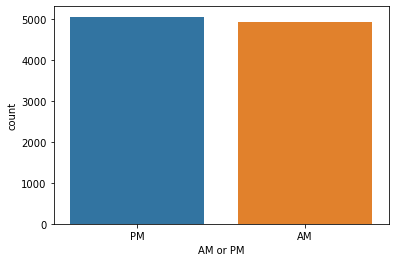

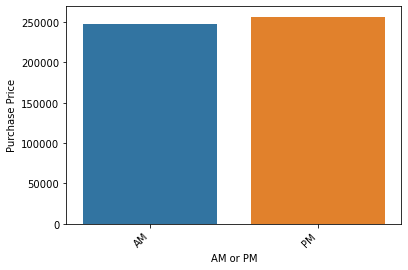

In [26]:

sns.countplot(df['AM or PM'],label='Count')
plt.show()
ax = sns.barplot(y = df.groupby('AM or PM')['Purchase Price'].sum(), x = df.groupby('AM or PM')['Purchase Price'].sum().index)
ax.set(xlabel="AM or PM", ylabel = "Purchase Price")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

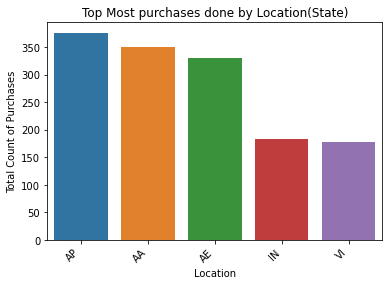

In [27]:
res=df.groupby(by='State', as_index=False).count()[['State','Purchase Price']]
res = res.sort_values(by='Purchase Price', ascending=False).head()
plt.title('Top Most purchases done by Location(State)')
ax = sns.barplot(x = "State", y = "Purchase Price", data = res)
ax.set(xlabel="Location", ylabel = "Total Count of Purchases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Top 5 most purchase done by professionals

In [28]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].sum()
res1= job.sort_values(by='Purchase Price', ascending=False).head()
res1

,Job,Purchase Price
325,Lawyer,1623.829208
473,Purchasing manager,1577.970000
158,Dietitian,1544.544604
151,"Designer, jewellery",1533.051906
312,Interior and spatial designer,1517.713812


[Text(0, 0, 'Lawyer'),
 Text(0, 0, 'Purchasing manager'),
 Text(0, 0, 'Dietitian'),
 Text(0, 0, 'Designer, jewellery'),
 Text(0, 0, 'Interior and spatial designer')]

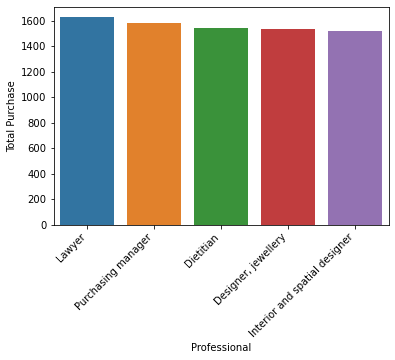

In [29]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1)
ax.set(xlabel="Professional", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [30]:
job = df.groupby(by=['Job'], as_index=False)['Purchase Price'].mean()
res1= job.sort_values(by='Purchase Price', ascending=False).head()
res1
        

,Job,Purchase Price
602,Trade mark attorney,73.802727
4,"Accountant, chartered management",69.648487
149,"Designer, industrial/product",69.355640
430,Politician's assistant,68.797485
448,Production manager,68.135730


[Text(0, 0, 'Trade mark attorney'),
 Text(0, 0, 'Accountant, chartered management'),
 Text(0, 0, 'Designer, industrial/product'),
 Text(0, 0, "Politician's assistant"),
 Text(0, 0, 'Production manager')]

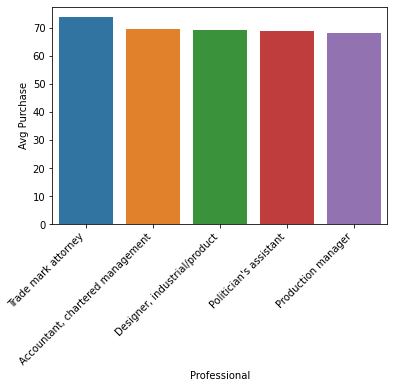

In [31]:
ax = sns.barplot(x = "Job", y = "Purchase Price", data = res1)
ax.set(xlabel="Professional", ylabel = "Avg Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [32]:
print('The TOP 5 customers with max amount of purchase...')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 customers with max amount of purchase...


,Email,Purchase Price
1084,brownsarah@gmail.com,198.830000
9549,wjohnson@yahoo.com,175.610000
1342,cgray@gmail.com,154.410000
9531,wilsonjohn@yahoo.com,153.360000
5255,lawrenceemily@yahoo.com,147.917302


In [33]:
#customer = 

[Text(0, 0, 'brownsarah@gmail.com'),
 Text(0, 0, 'wjohnson@yahoo.com'),
 Text(0, 0, 'cgray@gmail.com'),
 Text(0, 0, 'wilsonjohn@yahoo.com'),
 Text(0, 0, 'lawrenceemily@yahoo.com')]

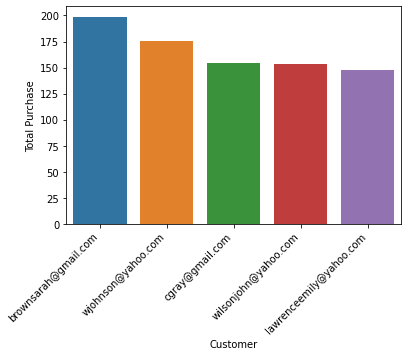

In [34]:
ax = sns.barplot(x = "Email", y = "Purchase Price", data = res)
ax.set(xlabel="Customer", ylabel = "Total Purchase")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

In [35]:
print('The TOP 5 customers with max amount of purchase and their companies')
res = df.groupby(by=['Email'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
pd.merge(df, res, how='inner', on = 'Email')[['Email', 'Company']]



The TOP 5 customers with max amount of purchase and their companies


,Email,Company
0,wjohnson@yahoo.com,Morrison LLC
1,wjohnson@yahoo.com,Weiss-Smith
2,wilsonjohn@yahoo.com,Williams Inc
3,wilsonjohn@yahoo.com,Davis and Sons
4,cgray@gmail.com,Anderson-Adams
5,cgray@gmail.com,Mills-Mccarty
6,brownsarah@gmail.com,"Nichols, Parrish and Jackson"
7,brownsarah@gmail.com,"Davis, Smith and Horn"
8,lawrenceemily@yahoo.com,"Evans, Sims and Barnes"
9,lawrenceemily@yahoo.com,Johnson Group


Discover patterns for Purchase Price¶

In [36]:
df['Purchase Price'].describe()

count    10000.000000
mean        50.445186
std         27.662944
min          0.000000
25%         27.930000
50%         50.347302
75%         73.162500
max         99.990000
Name: Purchase Price, dtype: float64

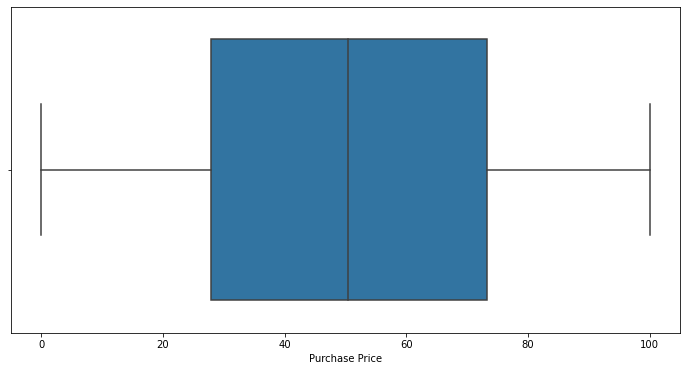

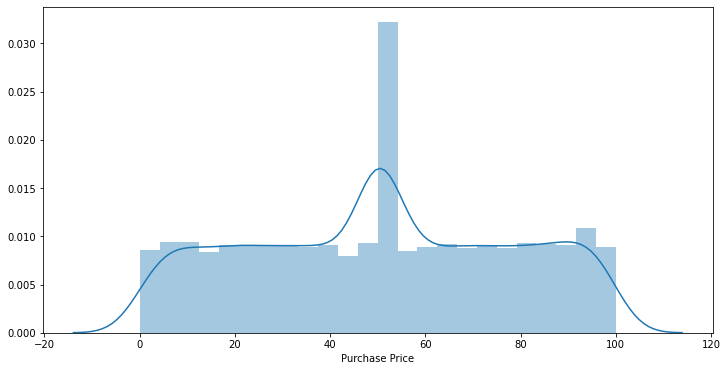

In [37]:
# check the distribution of Purchase price
plt.subplots(figsize=(12,6))
sns.boxplot(df['Purchase Price'])
plt.show()
plt.subplots(figsize=(12,6))
sns.distplot(df['Purchase Price'])
plt.show()

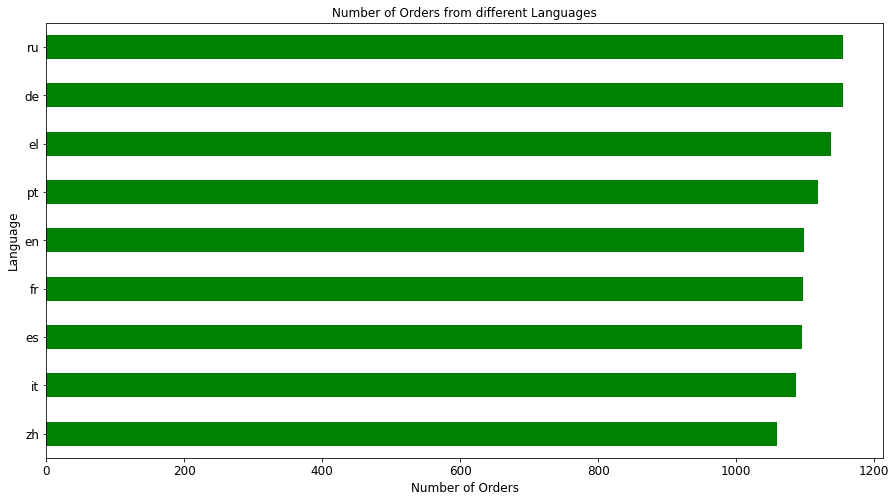

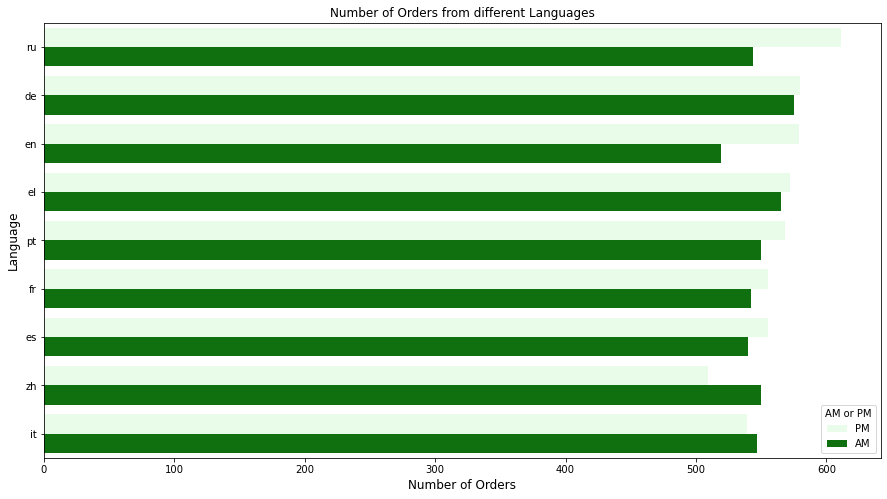

In [38]:
group_language_orders = df.groupby('Language')['Purchase Price'].count().sort_values()

# plot number of unique customers in each Language
plt.subplots(figsize=(15,8))
group_language_orders.plot(kind='barh', fontsize=12, color='green')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

plt.subplots(figsize=(15,8))
group_language_order_hue = df.groupby(['Language', 'AM or PM'])['Purchase Price'].count().sort_values(ascending = False).reset_index()
sns.barplot(y = 'Language', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = group_language_order_hue,\
            color = 'green' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Number of Orders from different Languages', fontsize=12)
plt.show()

Browser Usage Analysis for purchase¶

In [39]:
browser_data = df.groupby(by='Browser', as_index=False)['Purchase Price'].count()
browser_data

,Browser,Purchase Price
0,Mozilla,7924
1,Opera,2076


In [40]:
from matplotlib.pyplot import pie, axis, show
browser_data['Browser']=browser_data['Browser'].map({'Mozilla':0,'Opera':1})

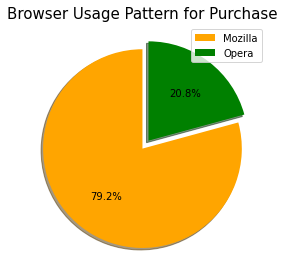

In [41]:
labels = ['Mozilla','Opera']
colors = ['orange', 'green'] 
explode =(0,0.1) 
fig, ax1 = plt.subplots(figsize = (9,4)) 
ax1.pie(browser_data['Purchase Price'], explode = explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
plt.title('Browser Usage Pattern for Purchase', fontsize = 15) 
ax1.legend(labels, loc = 'upper right') 
plt.tight_layout() 
plt.show()


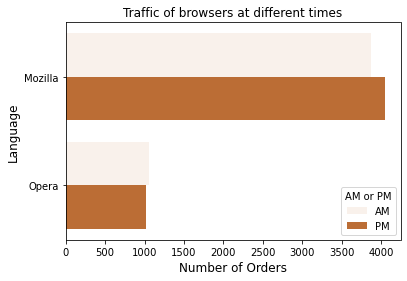

In [42]:
browser_data_hue = df.groupby(by=['Browser','AM or PM'], as_index=False)['Purchase Price'].count()
sns.barplot(y = 'Browser', x = 'Purchase Price' ,hue='AM or PM', orient = 'h', data = browser_data_hue,\
            color = 'chocolate' )
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Language', fontsize=12)
plt.title('Traffic of browsers at different times', fontsize=12)
plt.show()

In [43]:
print('The TOP 5 Companies with max amount of purchase...')
res = df.groupby(by=['Company'], as_index=False)['Purchase Price'].sum()
res = res.sort_values(by='Purchase Price', ascending=False).head()
res

The TOP 5 Companies with max amount of purchase...


,Company,Purchase Price
805,Brown Ltd,795.414604
8303,Williams LLC,723.630000
7168,Smith PLC,651.914604
7166,Smith LLC,644.777302
1724,Davis and Sons,576.147302


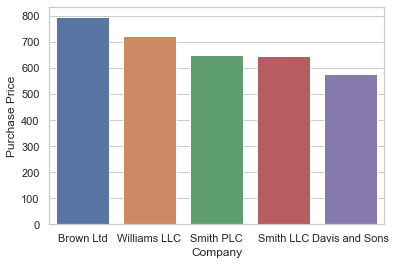

In [44]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Company", y="Purchase Price", data=res)

In [45]:
#res.iplot(kind='bar', x="Company", y="Purchase Price", color='green')


In [46]:
#All jobs registered
df['Job'].value_counts().index

Index(['Interior and spatial designer', 'Lawyer', 'Social researcher',
       'Designer, jewellery', 'Research officer, political party',
       'Purchasing manager', 'Charity fundraiser', 'Dietitian',
       'Special educational needs teacher', 'Social worker',
       ...
       'Art gallery manager', 'Nurse, learning disability', 'Stage manager',
       'Music therapist', 'Special effects artist', 'Prison officer',
       'Editor, film/video', 'Actuary', 'Information systems manager',
       'Investment analyst'],
      dtype='object', length=623)

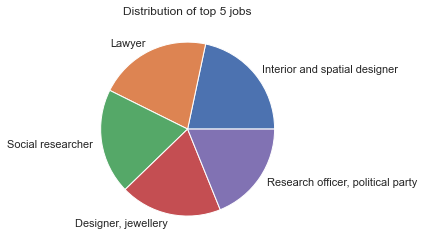

In [47]:
plt.pie(df['Job'].value_counts().head(), labels = df['Job'].value_counts().head().index )
plt.title('Distribution of top 5 jobs')
plt.show()

In [48]:
df['Job'].value_counts().head().index

Index(['Interior and spatial designer', 'Lawyer', 'Social researcher',
       'Designer, jewellery', 'Research officer, political party'],
      dtype='object')

In [49]:
df['CC Provider'].str.split(pat = '\d', expand = True)[0].unique()#Find the 10 credit card providers

array(['JCB ', 'Mastercard', 'Discover', 'Diners Club / Carte Blanche',
       'VISA ', 'American Express', 'Voyager', 'Maestro'], dtype=object)

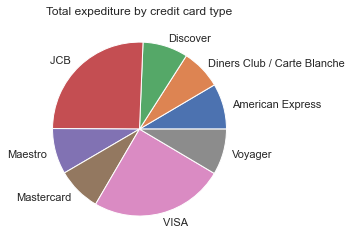

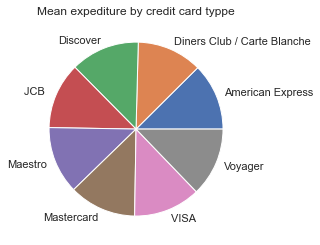

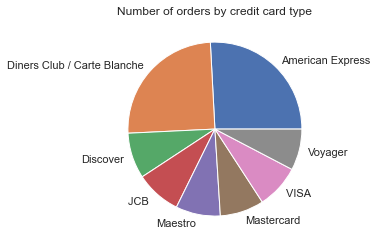

In [50]:
df['CC Provider'] = df['CC Provider'].str.split(pat = '\d', expand = True)[0]

cctotal = df.groupby('CC Provider')['Purchase Price'].sum()
ccmean = df.groupby('CC Provider')['Purchase Price'].mean()
ccorder = df['CC Provider'].value_counts()
ccindex = df.groupby('CC Provider')['Purchase Price'].mean().index
ccorder = df['CC Provider'].value_counts()

plt.pie(cctotal, labels = ccindex )
plt.title('Total expediture by credit card type')
plt.show()

plt.pie(ccmean, labels = ccindex )
plt.title('Mean expediture by credit card typpe')
plt.show()

plt.pie(ccorder, labels = ccindex )
plt.title('Number of orders by credit card type')
plt.show()


In [51]:
#Users with expired credit cards
exp = cleaned_ecom[(cleaned_ecom['CC Exp Year'] < 20) & (cleaned_ecom['CC Exp Month'] < 9)]
print("No of Users with expired cards ", exp['Email'].nunique())

No of Users with expired cards  2022
